In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.waveform import GenerateEMRIWaveform
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import *

os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *
# set initial parameters
M = 1e6
m = 1e1
mu = 5.8e-18
a = 0.9
p0 = 14.0
e0 = 0.2
iota0 = 0.1
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 15.0
T = 20.0

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))


use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "npoints": 50,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

alpha = 0.0434022007571189


# Without Proca

In [2]:
wfgenerator = EMRIWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)
withoutproca = wfgenerator(M, m, a, p0, e0, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

Integration halted before ending time. Reasons: PN Energy flux larger than zero! Breaking.


/mnt/Data_Volume/Computer_Programs/Anaconda/envs/few_env/lib/python3.7/site-packages/few-1.4.6-py3.7-linux-x86_64.egg/few/summation/aakwave.py:228: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."


# With Proca

In [ ]:
wfgen = EMRIWithProcaWaveform()
withproca = wfgen(M,m,mu,a,p0,e0,Y0,T=T,qS=qS,phiS=phiS,qK=qK,phiK=phiK,dist=dist,mich=mich)

/mnt/Data_Volume/Computer_Programs/Anaconda/envs/few_env/lib/python3.7/site-packages/few-1.4.6-py3.7-linux-x86_64.egg/few/utils/utility.py:110: UserWarning: The two time series are not the same length (10519384 vs 10007966). The calculation will run with length 10007966 starting at index 0 for both arrays.
  len(time_series_1), len(time_series_2), min_len


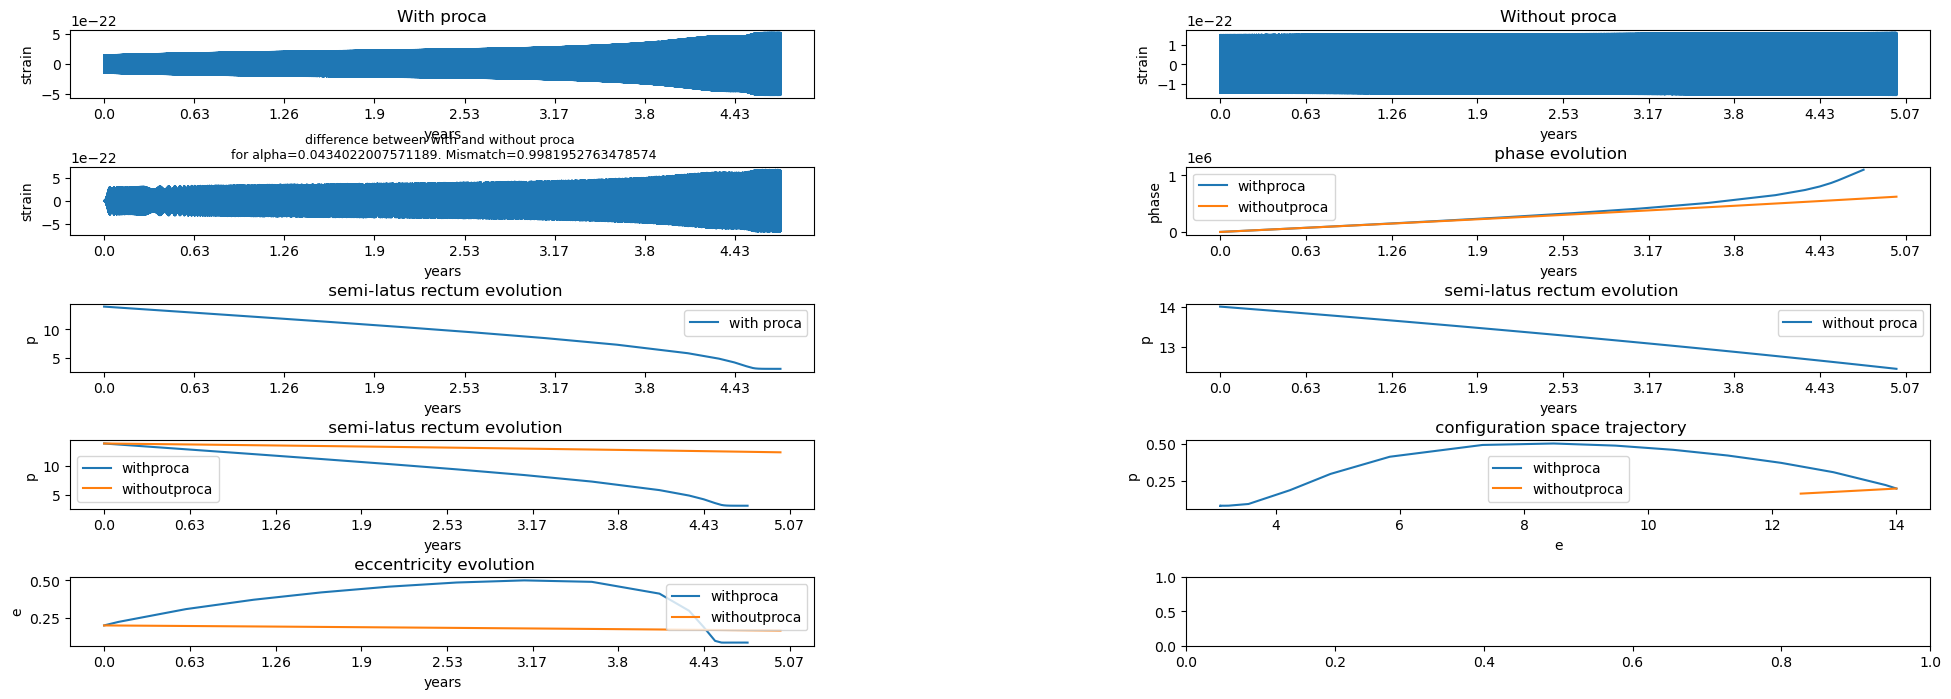

In [5]:
mismatch = get_mismatch(withoutproca, withproca)


tp = np.arange(len(withproca)) * dt;
twp = np.arange(len(withoutproca)) * dt

fig,ax = plt.subplots(5,2, figsize=(24,8))
plt.subplots_adjust(hspace=1, wspace=0.5)
ax[0,0].plot(tp, withproca.real)
ax[0,0].set_title("With proca")
ticks = ax[0,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[0,0].set_xticks(ticks, newlabs);
ax[0,0].set_xlabel("years");
ax[0,0].set_ylabel("strain");

ax[0,1].plot(twp, withoutproca.real)
ax[0,1].set_title("Without proca")
ticks = ax[0,1].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[0,1].set_xticks(ticks, newlabs);
ax[0,1].set_xlabel("years");
ax[0,1].set_ylabel("strain");

minwave = min([len(withproca), len(withoutproca)])
dom =tp[0:minwave-1]
ax[1,0].plot(dom, (withproca.real[0:minwave-1]-withoutproca.real[0:minwave-1]));
ax[1,0].set_title("difference between with and without proca \n for alpha={0}. Mismatch={1}".format(alphaval,mismatch), fontdict={"fontsize":9});
ticks = ax[1,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[1,0].set_xticks(ticks, newlabs);
ax[1,0].set_xlabel("years");
ax[1,0].set_ylabel("strain");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[1,1].plot(wfgen.Trajectory["t"], wfgen.Trajectory["Phi_phi"], label="withproca")
ax[1,1].plot(wfgenerator.Trajectory["t"], wfgenerator.Trajectory["Phi_phi"], label="withoutproca")
ax[1,1].set_title(" phase evolution")
ax[1,1].legend()
ticks = ax[1,1].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[1,1].set_xticks(ticks, newlabs);
ax[1,1].set_xlabel("years");
ax[1,1].set_ylabel("phase");


ax[2,0].plot(wfgen.Trajectory["t"], wfgen.Trajectory["p"], label="with proca")
ax[2,0].set_title(" semi-latus rectum evolution")
ax[2,0].legend()
ticks = ax[2,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[2,0].set_xticks(ticks, newlabs);
ax[2,0].set_xlabel("years");
ax[2,0].set_ylabel("p");

ax[2,1].plot(wfgenerator.Trajectory["t"], wfgenerator.Trajectory["p"], label="without proca")
ax[2,1].set_title(" semi-latus rectum evolution")
ax[2,1].legend()
ticks = ax[2,1].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[2,1].set_xticks(ticks, newlabs);
ax[2,1].set_xlabel("years");
ax[2,1].set_ylabel("p");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[3,0].plot(wfgen.Trajectory["t"], wfgen.Trajectory["p"], label="withproca")
ax[3,0].plot(wfgenerator.Trajectory["t"], wfgenerator.Trajectory["p"], label="withoutproca")
ax[3,0].set_title(" semi-latus rectum evolution")
ax[3,0].legend()
ticks = ax[3,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[3,0].set_xticks(ticks, newlabs);
ax[3,0].set_xlabel("years");
ax[3,0].set_ylabel("p");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[3,1].plot(wfgen.Trajectory["p"], wfgen.Trajectory["e"], label="withproca")
ax[3,1].plot(wfgenerator.Trajectory["p"], wfgenerator.Trajectory["e"], label="withoutproca")
ax[3,1].set_title(" configuration space trajectory")
ax[3,1].legend()
ax[3,1].set_xlabel("e");
ax[3,1].set_ylabel("p");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[4,0].plot(wfgen.Trajectory["t"], wfgen.Trajectory["e"], label="withproca")
ax[4,0].plot(wfgenerator.Trajectory["t"], wfgenerator.Trajectory["e"], label="withoutproca")
ax[4,0].set_title(" eccentricity evolution")
ax[4,0].legend()
ticks = ax[4,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[4,0].set_xticks(ticks, newlabs);
ax[4,0].set_xlabel("years");
ax[4,0].set_ylabel("e");

plt.show()

In [7]:
[get_separatrix(0.9,i,1.) for i in wfgen.Trajectory["e"]]

[2.5007620045187737,
 2.5007620049687693,
 2.500762009473327,
 2.500762054468654,
 2.500762504472063,
 2.5007670043891137,
 2.50081199732298,
 2.501261300567228,
 2.5056930108274353,
 2.5448383235200587,
 2.578077928814277,
 2.6046537295526293,
 2.6247908516654648,
 2.6376480777772615,
 2.6407908129070226,
 2.6279827735296233,
 2.577946350519443,
 2.5136338090203254,
 2.4524603657784603,
 2.4097607674949417,
 2.3831212842844662,
 2.383608842304551,
 2.386318305903088,
 2.3875186596689666,
 2.3880542668165523,
 2.3882804614734603,
 2.388413921355414,
 2.3882321392750594,
 2.3885210297025177,
 2.3882626387197163,
 2.3884878529392504,
 2.3882544744175824,
 2.3884850548128966,
 2.38825665113449,
 2.3884861153136,
 2.3882564138359865,
 2.3884858561334243,
 2.388256433996917,
 2.3884859168165997,
 2.388256440705506,
 2.3884859052846954,
 2.388256437440467,
 2.388485907205932,
 2.3882564385315876,
 2.388485906997235,
 2.38825643825263,
 2.388485906993078,
 2.3882564383166245,
 2.3884859070055